In [5]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM
import pandas as pd

In [6]:
f = pd.read_hdf("/Volumes/BigDisk/Work/MachineLearning/LHCOlympics2020/events_anomalydetection.h5")

In [13]:
f.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
         ...   
2071    float64
2072    float64
2073    float64
2074    float64
2075    float64
2076    float64
2077    float64
2078    float64
2079    float64
2080    float64
2081    float64
2082    float64
2083    float64
2084    float64
2085    float64
2086    float64
2087    float64
2088    float64
2089    float64
2090    float64
2091    float64
2092    float64
2093    float64
2094    float64
2095    float64
2096    float64
2097    float64
2098    float64
2099    float64
2100    float64
Length: 2101, dtype: obj

In [7]:
events_combined = f.T

In [14]:
events_combined.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
28         float64
29         float64
            ...   
1099970    float64
1099971    float64
1099972    float64
1099973    float64
1099974    float64
1099975    float64
1099976    float64
1099977    float64
1099978    float64
1099979    float64
1099980    float64
1099981    float64
1099982    float64
1099983    float64
1099984    float64
1099985    float64
1099986    float64
1099987    float64
1099988    float64
1099989    float64
1099990    float64
1099991    f

In [8]:
np.shape(events_combined)

(2101, 1100000)

In [9]:
#Now, let's cluster some jets!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(100000): #len(events_combined)):
        if (i%10000==0):
            print(mytype,i)
            pass
        issignal = events_combined[i][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
             continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        for j in range(700):
            if (events_combined[i][j*3]>0):
                pseudojets_input[j]['pT'] = events_combined[i][j*3]
                pseudojets_input[j]['eta'] = events_combined[i][j*3+1]
                pseudojets_input[j]['phi'] = events_combined[i][j*3+2]
                pass
            pass
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        alljets[mytype] += [jets]
        pass

background 0
background 10000
background 20000
background 30000
background 40000
background 50000
background 60000
background 70000
background 80000
background 90000
signal 0
signal 10000
signal 20000
signal 30000
signal 40000
signal 50000
signal 60000
signal 70000
signal 80000
signal 90000


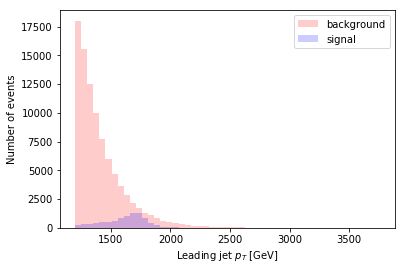

<Figure size 432x288 with 0 Axes>

In [10]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("leadjetpt.pdf")

In [11]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(alljets[mytype])):
        E = alljets[mytype][k][0].e+alljets[mytype][k][1].e
        px = alljets[mytype][k][0].px+alljets[mytype][k][1].px
        py = alljets[mytype][k][0].py+alljets[mytype][k][1].py
        pz = alljets[mytype][k][0].pz+alljets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]
        pass
    pass

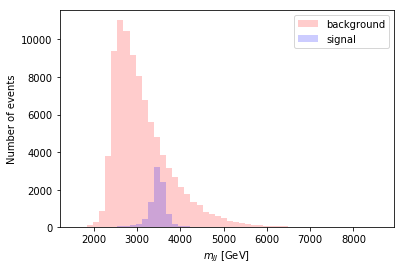

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("mjj.pdf")